Convolution (Lecture 1.9)

In [1]:
import tensorflow as tf

In [2]:
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
%matplotlib inline

import some image datea from skimage library

In [4]:
from skimage import data

get camera man image

In [5]:
img = data.camera().astype(np.float32)

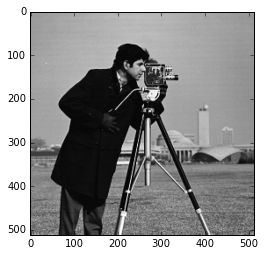

In [6]:
plt.imshow(img, cmap='gray')

In [7]:
print(img.shape)

(512, 512)


make it a 4D array to work with tensorflow

In [8]:
img_4d = img.reshape([1, img.shape[0], img.shape[1], 1])

In [9]:
print(img_4d)

[[[[ 156.]
   [ 157.]
   [ 160.]
   ..., 
   [ 152.]
   [ 152.]
   [ 152.]]

  [[ 156.]
   [ 157.]
   [ 159.]
   ..., 
   [ 152.]
   [ 152.]
   [ 152.]]

  [[ 158.]
   [ 157.]
   [ 156.]
   ..., 
   [ 152.]
   [ 152.]
   [ 152.]]

  ..., 
  [[ 121.]
   [ 123.]
   [ 126.]
   ..., 
   [ 121.]
   [ 113.]
   [ 111.]]

  [[ 121.]
   [ 123.]
   [ 126.]
   ..., 
   [ 121.]
   [ 113.]
   [ 111.]]

  [[ 121.]
   [ 123.]
   [ 126.]
   ..., 
   [ 121.]
   [ 113.]
   [ 111.]]]]


In [10]:
print(img_4d.shape)

(1, 512, 512, 1)


or use tensorflow reshape function

In [12]:
img_4d = tf.reshape(img,[1, img.shape[0], img.shape[1], 1])

In [13]:
img_4d

<tf.Tensor 'Reshape:0' shape=(1, 512, 512, 1) dtype=float32>

In [14]:
img_4d.get_shape()

TensorShape([Dimension(1), Dimension(512), Dimension(512), Dimension(1)])

In [15]:
img_4d.get_shape().as_list()

[1, 512, 512, 1]

Convolution Kernels

create gaussian kernel (from previous lesson)

In [16]:
mean = 0

In [17]:
sigma = 1.0

In [19]:
x = tf.linspace(-3.0, 3.0, 100)

In [20]:
z = (tf.exp(tf.neg(tf.pow(x-mean, 2.0) / (2.0 * tf.pow(sigma,2.0))))) * (1.0 / (sigma * tf.sqrt(2.0 * 3.1415)))

In [21]:
ksize = z.get_shape().as_list()[0]

In [22]:
z_2d = tf.matmul(tf.reshape(z, [ksize,1]), tf.reshape(z, [1,ksize]))

create 4D matrix from that

In [23]:
z_4d = tf.reshape(z_2d,[ksize, ksize, 1, 1])

In [25]:
print(z_4d.get_shape().as_list())

[100, 100, 1, 1]


make the convolution 

In [27]:
convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1,1,1,1], padding = 'SAME')

In [29]:
sess = tf.InteractiveSession()

In [30]:
res = convolved.eval()

In [31]:
print(res.shape)

(1, 512, 512, 1)


 to visualize we have to transform array again

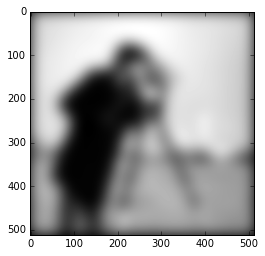

In [33]:
plt.imshow(np.squeeze(res),cmap='gray')

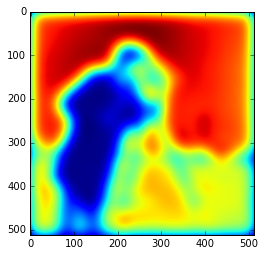

In [34]:
plt.imshow(res[0,:,:,0])

Gabor Kernel

In [35]:
xs = tf.linspace(-3.0, 3-0, ksize)

In [36]:
ys = tf.sin(xs)

In [37]:
plt.figure()

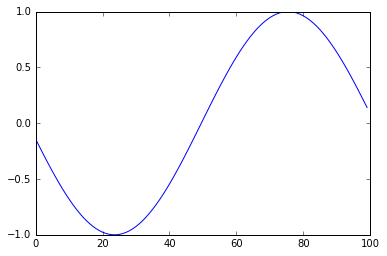

In [38]:
plt.plot(ys.eval())

convert to matrix

In [40]:
ys = tf.reshape(ys, [ksize,1])

repeat across matrix

In [41]:
ones = tf.ones((1,ksize))

In [43]:
wave = tf.matmul(ys,ones)

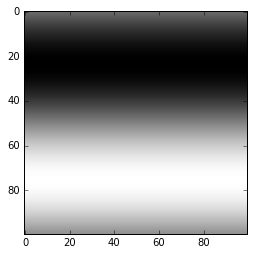

In [44]:
plt.imshow(wave.eval(), cmap = 'gray')

create Gabor Kernel

In [45]:
gabor = tf.mul(wave, z_2d)

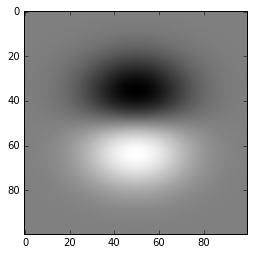

In [46]:
plt.imshow(gabor.eval(), cmap = 'gray')

using placeholders for image and kernel

In [47]:
img = tf.placeholder(tf.float32, shape=[None,None], name='img')

add extra dimensions

In [48]:
img_3d = tf.expand_dims(img,2)

In [49]:
dims = img_3d.get_shape()

In [50]:
img_4d =  tf.expand_dims(img_3d,0)

In [51]:
print(img_4d.get_shape().as_list())

[1, None, None, 1]


create placeholders for Gabor parameters

In [52]:
mean = tf.placeholder(tf.float32,  name='mean')

In [53]:
sigma = tf.placeholder(tf.float32,  name='sigma')

In [54]:
ksize = tf.placeholder(tf.int32,  name='ksize')

In [55]:
x = tf.linspace(-3.0, 3.0, ksize)

In [56]:
z = (tf.exp(tf.neg(tf.pow(x-mean, 2.0) / (2.0 * tf.pow(sigma,2.0))))) * (1.0 / (sigma * tf.sqrt(2.0 * 3.1415)))

In [58]:
z_2d = tf.matmul(tf.reshape(z, tf.pack([ksize,1])), tf.reshape(z, tf.pack([1,ksize])))

In [59]:
ys = tf.sin(x)

In [61]:
ys = tf.reshape(ys, tf.pack([ksize,1]))

In [62]:
ones = tf.ones(tf.pack([1,ksize]))

In [63]:
wave = tf.matmul(ys,ones)

In [64]:
gabor = tf.mul(wave, z_2d)

In [65]:
gabor_4d = tf.reshape(gabor, tf.pack([ksize, ksize, 1, 1]))

In [66]:
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1,1,1,1], padding = 'SAME', name='convolved')

In [68]:
convolved_img = convolved[0,:,:,0]

In [69]:
res = convolved_img.eval(feed_dict={img: data.camera(), mean:0.0, sigma:1.0, ksize:100})

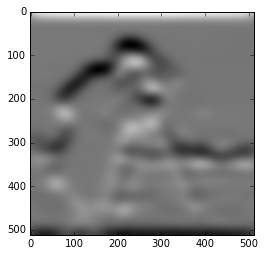

In [70]:
plt.imshow(res, cmap='gray')

In [71]:
res = convolved_img.eval(feed_dict={img: data.camera(), mean:0.0, sigma:0.5, ksize:32})

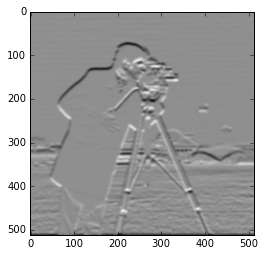

In [72]:
plt.imshow(res, cmap='gray')